# DATA PREPROCESSING

## Importing the libraries

In [4]:
import tensorflow as tf
import pandas as pd
from scipy.stats import chi2_contingency
from datetime import datetime
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(tf.__version__)

2.14.0


## Importing the dataset

In [6]:
# Dataset with all columns
dataset = pd.read_csv("Dataset/credit_card_subset.csv")
dataset

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-07-21 17:20:32,"Kilback, Nitzsche and Leffle",travel,5.69,Mound City,MO,40.1362,-95.2138,1631,Architect,1953-01-20,657f3b5d8265a7baed9b094f95b93f39,40.591103,-94.445245,0
1,2019-10-07 12:10:26,Christiansen-Gusikowski,misc_pos,51.20,Rocky Mount,MO,38.2911,-92.7059,1847,Tax inspector,1988-10-26,a0a6120995d90497124eb9117797dc2a,38.682440,-93.288181,0
2,2020-12-27 12:40:48,Gulgowski LLC,home,225.07,Tomales,CA,38.2427,-122.9145,337,Occupational psychologist,1954-07-05,737b67154bcfb5fa19edfed0b5dc9640,38.593997,-122.226545,0
3,2020-11-20 03:11:53,Hudson-Ratke,grocery_pos,121.80,Lagrange,WY,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,9bfac49eb4605e0a7560ac91a526164a,41.219040,-104.248942,0
4,2019-12-08 07:33:54,Hermann-Gaylo,misc_pos,140.93,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,0560bebe84613889bff8924f27538b5b,39.205949,-105.962080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33956,2019-08-04 16:26:10,Gleason-Macejkovic,shopping_net,1.67,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,97d739c12712fb682d9696bc002a6a98,41.905722,-96.442696,0
33957,2019-10-26 10:50:43,"Bins, Balistreri and Beatty",shopping_pos,9.08,Saint Louis,MO,38.6171,-90.4504,927396,Occupational hygienist,1960-03-12,15dd6c4faced8d91b163291f02646e93,39.000982,-91.024037,0
33958,2020-07-12 05:54:46,Kutch Group,grocery_net,36.88,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,77e01ddbaf0f3ee332d93af948fb275d,41.483717,-96.345731,0
33959,2019-04-16 21:41:47,"Konopelski, Schneider and Hartmann",food_dining,12.83,Tekoa,WA,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,f738dc0ff880a1f68293477dde82de26,46.496408,-116.668911,0


## Data Exploration and Understanding

In [7]:
# Explore the data types of the columns
dataset.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [8]:
dataset.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,33961.000000,33961.000000,33961.000000,3.396100e+04,33961.000000,33961.000000,33961.000000
mean,70.760032,39.707463,-110.690501,1.058948e+05,39.706654,-110.700418,0.005094
std,152.198557,5.126336,12.704703,2.895875e+05,5.160603,12.718162,0.071192
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.670685,0.000000
25%,9.550000,36.715400,-120.093600,4.710000e+02,36.773361,-119.837639,0.000000
50%,46.680000,39.599400,-111.029200,1.661000e+03,39.571367,-111.060831,0.000000
75%,83.970000,41.710000,-101.136000,3.570500e+04,42.168704,-100.553748,0.000000
max,8895.570000,66.693300,-89.628700,2.383912e+06,66.679297,-88.632541,1.000000


In [9]:
#To gets the columns that are most correlated with the class column
corr = dataset.corr(numeric_only=True)['is_fraud'].sort_values
corr


<bound method Series.sort_values of amt           0.227443
lat           0.006511
long         -0.000097
city_pop     -0.007120
merch_lat     0.006280
merch_long   -0.000182
is_fraud      1.000000
Name: is_fraud, dtype: float64>

The 'amt' feature appears to have a positive correlation with 'is_fraud,' suggesting that higher transaction amounts might be associated with a higher likelihood of fraud.

The 'city_pop' feature has a very weak correlation with 'is_fraud,' suggesting it may not be a strong predictor.

In [10]:


# Select the categorical columns with 'object' data type
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Create a dictionary to store chi-square statistics and p-values
chi2_results = {}

# Perform Chi-Square test for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(dataset[col], dataset['is_fraud'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi-Square': chi2, 'p-value': p}

# Create a DataFrame from the results
chi2_results_df = pd.DataFrame(chi2_results).T

# Sort by p-value (smaller p-values indicate stronger association)
chi2_results_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print the results
print(chi2_results_df)

                         Chi-Square       p-value
city                    3994.086138  0.000000e+00
job                     2410.496146  0.000000e+00
dob                     4199.467315  0.000000e+00
category                 159.135346  2.949278e-27
state                     23.607490  2.298958e-02
merchant                 756.957218  4.344633e-02
trans_date_trans_time  33961.000000  4.806169e-01
trans_num              33961.000000  4.974487e-01


Columns like 'city,' 'job,' 'dob,' 'category,' 'state,' and 'merchant' have very low p-values close to zero, indicating a strong association with the target variable ('isFraud').

The 'trans_date_trans_time' column has a p-value of approximately 0.354, indicating that it may not be strongly associated with the target variable.

The 'trans_num' column has a p-value of approximately 0.499, indicating no significant association with the target variable.

In [11]:
# To explore a particular column
dataset['merchant'].describe()

count           33961
unique            693
top       Kilback LLC
freq              115
Name: merchant, dtype: object

In [12]:
# To explore a particular column
dataset['category'].describe()

count             33961
unique               14
top       gas_transport
freq               3529
Name: category, dtype: object

In [13]:
# To explore a particular column
dataset['city'].describe()

count       33961
unique        172
top       Phoenix
freq          709
Name: city, dtype: object

In [14]:
# To explore a particular column
dataset['state'].describe()

count     33961
unique       13
top          CA
freq       8117
Name: state, dtype: object

In [15]:
# To explore a particular column
dataset['job'].describe()

count                  33961
unique                   157
top       Surveyor, minerals
freq                     659
Name: job, dtype: object

In [16]:
# To explore a particular column
dataset['trans_date_trans_time'].describe()

count                   33961
unique                  33950
top       2020-01-16 21:32:45
freq                        2
Name: trans_date_trans_time, dtype: object

In [17]:
# To explore a particular column
dataset['dob'].describe()

count          33961
unique           180
top       1984-09-01
freq             469
Name: dob, dtype: object

In [18]:
# It returns the unique values in the column as an array.
pd.unique(dataset['category'].values)

array(['travel', 'misc_pos', 'home', 'grocery_pos', 'health_fitness',
       'kids_pets', 'misc_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'gas_transport', 'grocery_net', 'personal_care',
       'entertainment'], dtype=object)

## Data Cleaning

### (1) Removing irrelevant columns

In [19]:
# List of columns we want to keep
desired_columns = [ 'merchant', 'category', 'amt', 'state', 'city', 'job', 'dob', 'is_fraud']

# Filter the DataFrame to keep only the desired columns
filtered = dataset[desired_columns]

# 'filtered' now contains only the specified columns, and the rest are removed
filtered

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Kilback, Nitzsche and Leffle",travel,5.69,MO,Mound City,Architect,1953-01-20,0
1,Christiansen-Gusikowski,misc_pos,51.20,MO,Rocky Mount,Tax inspector,1988-10-26,0
2,Gulgowski LLC,home,225.07,CA,Tomales,Occupational psychologist,1954-07-05,0
3,Hudson-Ratke,grocery_pos,121.80,WY,Lagrange,Product/process development scientist,1973-07-13,0
4,Hermann-Gaylo,misc_pos,140.93,CO,Littleton,Water engineer,1975-07-31,0
...,...,...,...,...,...,...,...,...
33956,Gleason-Macejkovic,shopping_net,1.67,NE,Hooper,"Engineer, automotive",1973-12-26,0
33957,"Bins, Balistreri and Beatty",shopping_pos,9.08,MO,Saint Louis,Occupational hygienist,1960-03-12,0
33958,Kutch Group,grocery_net,36.88,NE,Hooper,"Engineer, automotive",1973-12-26,0
33959,"Konopelski, Schneider and Hartmann",food_dining,12.83,WA,Tekoa,Clothing/textile technologist,1999-05-31,0


In [20]:
# filtered = dataset.drop(['city_pop',lat', 'long', 'trans_num', 'merch_long', 'merch_lat'], axis=1)
# filtered

### (2) Handling missing data

In [21]:
# Use the “info()” function to have an idea about null columns.
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33961 entries, 0 to 33960
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   merchant  33961 non-null  object 
 1   category  33961 non-null  object 
 2   amt       33961 non-null  float64
 3   state     33961 non-null  object 
 4   city      33961 non-null  object 
 5   job       33961 non-null  object 
 6   dob       33961 non-null  object 
 7   is_fraud  33961 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ MB


In [22]:
# Check the null values count in the filtered dataset.
filtered.isnull().sum()

merchant    0
category    0
amt         0
state       0
city        0
job         0
dob         0
is_fraud    0
dtype: int64

### (3) Handling duplicate data 

In [23]:
# Check for duplicate rows
duplicate_rows = filtered[filtered.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
                            merchant      category   amt state       city  \
9778                       Price Inc  shopping_net  2.25    NM  Red River   
30837  Bernhard, Grant and Langworth  shopping_pos  9.07    UT       Moab   

                            job         dob  is_fraud  
9778   Surveyor, land/geomatics  1988-09-06         0  
30837          Location manager  1989-11-24         0  


In [24]:
# Handle duplicates
filtered.drop_duplicates(inplace=False)

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Kilback, Nitzsche and Leffle",travel,5.69,MO,Mound City,Architect,1953-01-20,0
1,Christiansen-Gusikowski,misc_pos,51.20,MO,Rocky Mount,Tax inspector,1988-10-26,0
2,Gulgowski LLC,home,225.07,CA,Tomales,Occupational psychologist,1954-07-05,0
3,Hudson-Ratke,grocery_pos,121.80,WY,Lagrange,Product/process development scientist,1973-07-13,0
4,Hermann-Gaylo,misc_pos,140.93,CO,Littleton,Water engineer,1975-07-31,0
...,...,...,...,...,...,...,...,...
33956,Gleason-Macejkovic,shopping_net,1.67,NE,Hooper,"Engineer, automotive",1973-12-26,0
33957,"Bins, Balistreri and Beatty",shopping_pos,9.08,MO,Saint Louis,Occupational hygienist,1960-03-12,0
33958,Kutch Group,grocery_net,36.88,NE,Hooper,"Engineer, automotive",1973-12-26,0
33959,"Konopelski, Schneider and Hartmann",food_dining,12.83,WA,Tekoa,Clothing/textile technologist,1999-05-31,0


## Feature Engineering

### (1) Converting 'dob' from object data type to numeric data type

In [25]:
# Assuming 'dob' column contains date of birth in a valid date format
filtered['dob'] = pd.to_datetime(filtered['dob'])

# Calculate age based on the current date
current_date = datetime.now()
filtered.loc[:, 'age'] = (current_date - filtered['dob']).dt.days // 365  # Calculate age in years

# 'age' column now contains the age of individuals as numeric values
print(filtered)


                                 merchant      category     amt state  \
0            Kilback, Nitzsche and Leffle        travel    5.69    MO   
1                 Christiansen-Gusikowski      misc_pos   51.20    MO   
2                           Gulgowski LLC          home  225.07    CA   
3                            Hudson-Ratke   grocery_pos  121.80    WY   
4                           Hermann-Gaylo      misc_pos  140.93    CO   
...                                   ...           ...     ...   ...   
33956                  Gleason-Macejkovic  shopping_net    1.67    NE   
33957         Bins, Balistreri and Beatty  shopping_pos    9.08    MO   
33958                         Kutch Group   grocery_net   36.88    NE   
33959  Konopelski, Schneider and Hartmann   food_dining   12.83    WA   
33960         Rodriguez, Yost and Jenkins      misc_net    3.68    WY   

                            city                                    job  \
0                     Mound City                

In [26]:
filtered['age'].describe()

count    33961.000000
mean        51.042313
std         17.042347
min         22.000000
25%         38.000000
50%         49.000000
75%         62.000000
max         96.000000
Name: age, dtype: float64

In [27]:
# List of columns we want to keep
desired_columns = [  'merchant', 'category', 'job', 'age', 'state', 'city','amt', 'is_fraud']

# Filter the DataFrame to keep only the desired columns
filtered = filtered[desired_columns]

# 'filtered_df' now contains only the specified columns, and the rest are removed
filtered

,merchant,category,job,age,state,city,amt,is_fraud
0,"Kilback, Nitzsche and Leffle",travel,Architect,70,MO,Mound City,5.69,0
1,Christiansen-Gusikowski,misc_pos,Tax inspector,34,MO,Rocky Mount,51.20,0
2,Gulgowski LLC,home,Occupational psychologist,69,CA,Tomales,225.07,0
3,Hudson-Ratke,grocery_pos,Product/process development scientist,50,WY,Lagrange,121.80,0
4,Hermann-Gaylo,misc_pos,Water engineer,48,CO,Littleton,140.93,0
...,...,...,...,...,...,...,...,...
33956,Gleason-Macejkovic,shopping_net,"Engineer, automotive",49,NE,Hooper,1.67,0
33957,"Bins, Balistreri and Beatty",shopping_pos,Occupational hygienist,63,MO,Saint Louis,9.08,0
33958,Kutch Group,grocery_net,"Engineer, automotive",49,NE,Hooper,36.88,0
33959,"Konopelski, Schneider and Hartmann",food_dining,Clothing/textile technologist,24,WA,Tekoa,12.83,0


### (2)  Encode categorical variables

In [28]:
# Encode categorical variables (using binary encoding)

categorical_columns = ['city', 'state', 'job', 'merchant', 'category']
encoder = ce.BinaryEncoder(cols=categorical_columns)
data = encoder.fit_transform(filtered)
data

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,amt,is_fraud
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,5.69,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,51.20,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,225.07,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,121.80,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,140.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33956,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,1,1,1,0,1.67,0
33957,0,0,0,0,1,1,1,1,0,1,...,0,0,0,1,1,1,1,0,9.08,0
33958,0,1,0,1,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,36.88,0
33959,0,0,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,12.83,0


In [29]:
data.dtypes

merchant_0      int64
merchant_1      int64
merchant_2      int64
merchant_3      int64
merchant_4      int64
merchant_5      int64
merchant_6      int64
merchant_7      int64
merchant_8      int64
merchant_9      int64
category_0      int64
category_1      int64
category_2      int64
category_3      int64
job_0           int64
job_1           int64
job_2           int64
job_3           int64
job_4           int64
job_5           int64
job_6           int64
job_7           int64
age             int64
state_0         int64
state_1         int64
state_2         int64
state_3         int64
city_0          int64
city_1          int64
city_2          int64
city_3          int64
city_4          int64
city_5          int64
city_6          int64
city_7          int64
amt           float64
is_fraud        int64
dtype: object

## Formatting data

In [30]:
# Create a dictionary with the mapping of old column names to new column names
column_mapping = {'amt': 'amount'}

# Use the 'rename()' method to rename the columns
data.rename(columns=column_mapping, inplace=True)

# 'data' now has the columns with the new names
data

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,amount,is_fraud
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,5.69,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,51.20,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,225.07,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,121.80,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,140.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33956,0,1,0,1,1,0,1,0,0,0,...,0,1,0,1,1,1,1,0,1.67,0
33957,0,0,0,0,1,1,1,1,0,1,...,0,0,0,1,1,1,1,0,9.08,0
33958,0,1,0,1,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,36.88,0
33959,0,0,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,12.83,0


In [31]:
#Save to a csv
#data.to_csv("cleaned_dataset.csv",index=False)

## Feature Selection

In [32]:
X = data.drop(columns=['is_fraud']) #feature variables
y = data['is_fraud'] #target variables


## Handling Class Imbalance (using oversampling)

In [33]:
#from imblearn.over_sampling import RandomOverSampler

#oversampler = RandomOverSampler(sampling_strategy='minority')
#X_resampled, y_resampled = oversampler.fit_resample(X, y)


# IMPLEMENTATION OF THE MODELS

## Train-Test Split 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Random Forest Model

In [43]:
#Model Instantiation Without Tuning Any Parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### No parameter tuning

In [33]:
# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

In [34]:
#Model Training
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
#Model Evaluation (Overfitting Check)
# Predict on training and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

In [36]:
# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 1.00


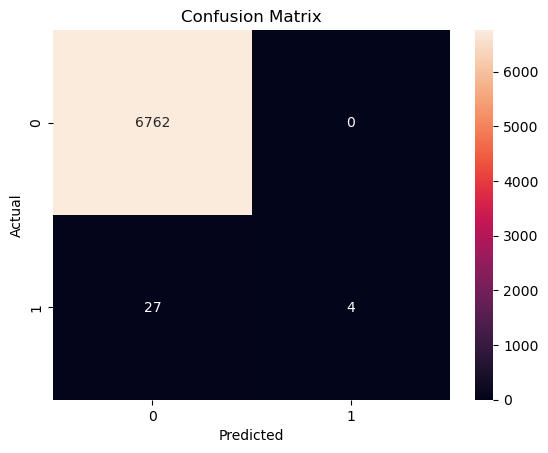

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix using the true labels (y_test) and predicted labels
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="g")
plt.rcParams['figure.figsize'] = (6, 4) 
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      0.13      0.23        31

    accuracy                           1.00      6793
   macro avg       1.00      0.56      0.61      6793
weighted avg       1.00      1.00      0.99      6793



## Hyperparameter Tuning 

In [39]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None,10],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}


In [40]:
# Create a Random Forest classifier
#rf_classifier = RandomForestClassifier(random_state=42)

In [41]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)


In [42]:
# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [43]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [44]:
#Model Refitting with Best Hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [45]:
# Accuracy Calculation
# Calculate accuracy on training and testing sets with tuned hyperparameters
best_train_accuracy = accuracy_score(y_train, best_rf_classifier.predict(X_train))
best_test_accuracy = accuracy_score(y_test, best_rf_classifier.predict(X_test))

print(f'Best Training Accuracy: {best_train_accuracy:.2f}')
print(f'Best Testing Accuracy: {best_test_accuracy:.2f}')

Best Training Accuracy: 1.00
Best Testing Accuracy: 1.00


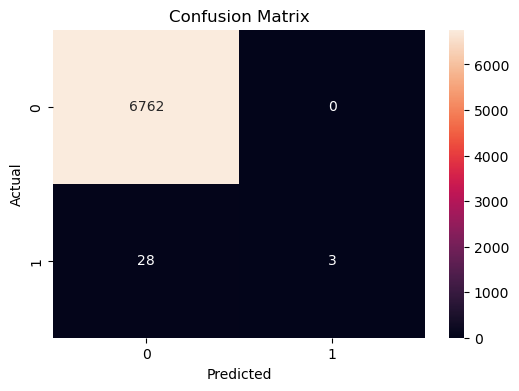

In [46]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix using the true labels (y_test) and predicted labels
cm = confusion_matrix(y_test, best_rf_classifier.predict(X_test))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="g")
plt.rcParams['figure.figsize'] = (6, 4) 
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
# F1 Score Calculation

#Calculate F1 score on the testing set
f1_score_value = f1_score(y_test, best_rf_classifier.predict(X_test))
print(f'F1 Score: {f1_score_value:.2f}')

F1 Score: 0.18


In [48]:

print(classification_report(y_test,best_rf_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      0.10      0.18        31

    accuracy                           1.00      6793
   macro avg       1.00      0.55      0.59      6793
weighted avg       1.00      1.00      0.99      6793



## 2. Naive Bayes Model

In [35]:
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV




### No parameter tuning

In [36]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [37]:
# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
#Model Evaluation (Overfitting Check)
# Predict on training and testing sets
y_train_pred = naive_bayes_classifier.predict(X_train)
y_test_pred = naive_bayes_classifier.predict(X_test)

In [39]:
#The accuracy of the model was computed by calculating the training set score and the testing set score
# Calculate the training set accuracy
training_accuracy = naive_bayes_classifier.score(X_train, y_train)
print(f'Training Set Accuracy: {training_accuracy:.3f}')

# Calculate the testing set accuracy
testing_accuracy = naive_bayes_classifier.score(X_test, y_test)
print(f'Testing Set Accuracy: {testing_accuracy:.3f}')

Training Set Accuracy: 0.987
Testing Set Accuracy: 0.989


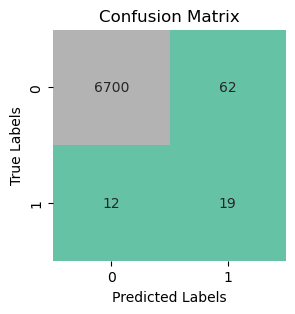

In [40]:
# Assuming you have predictions and true labels for your testing set
# y_test contains the true labels, and y_test_pred contains the predicted labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Define a custom color palette for the heatmap
# You can choose any palette you prefer
color_palette = sns.color_palette("Set2")

# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=color_palette, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()





In [44]:
# Evaluate the classifier's performance
classification_report_result = classification_report(y_test, y_test_pred)

In [45]:
# Print the classification report
print(classification_report_result)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6762
           1       0.23      0.61      0.34        31

    accuracy                           0.99      6793
   macro avg       0.62      0.80      0.67      6793
weighted avg       0.99      0.99      0.99      6793



#### Hyperparameter Tuning

In [46]:
# Perform K-fold cross-validation (replace 'X' and 'y' with your feature matrix and target variable)
cv_scores = cross_val_score(naive_bayes_classifier, X, y, cv=5)  # 'cv' specifies the number of folds (e.g., 5-fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean score: {mean_score:.2f}")
print(f"Standard deviation: {std_deviation:.2f}")


Cross-validation scores: [0.98763433 0.99116608 0.98822144 0.98468787 0.98748528]
Mean score: 0.99
Standard deviation: 0.00


In [47]:
# Define the range of values for var_smoothing in a logarithmic scale
# The example below creates values from 1e-9 to 1e-1 with 10 values.
var_smoothing_values = np.logspace(-9, -1, 10)

# Print the values to see the range
print(var_smoothing_values)

[1.00000000e-09 7.74263683e-09 5.99484250e-08 4.64158883e-07
 3.59381366e-06 2.78255940e-05 2.15443469e-04 1.66810054e-03
 1.29154967e-02 1.00000000e-01]


In [48]:
# Define the number of splits and repeats (e.g., 5 splits, 3 repeats)
n_splits = 5
n_repeats = 3

# Create the Repeated Stratified K-Fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)




In [49]:
# Define the hyperparameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create the Repeated Stratified K-Fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Create the GridSearchCV object
grid_search_1 = GridSearchCV(estimator=naive_bayes_classifier, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search_1.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_1.best_params_
print('Best Hyperparameters:')
print(best_params)


Best Hyperparameters:
{'var_smoothing': 1e-06}


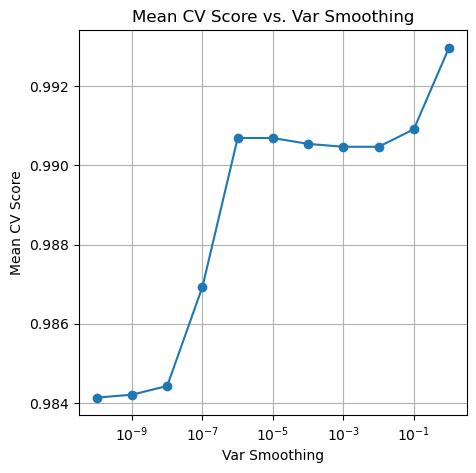

Best Var Smoothing: 1.0


GaussianNB(var_smoothing=1.0)

In [50]:
# Define a range of values for the hyperparameter (var_smoothing in this case)
hyperparameter_values = np.logspace(-10, 0, 11)  # Example values from 1e-10 to 1

# Create an empty list to store mean CV scores
mean_cv_scores = []

# Iterate over the hyperparameter values and compute mean CV scores
for var_smoothing in hyperparameter_values:
    # Create a Gaussian Naive Bayes classifier with the current var_smoothing value
    classifier = GaussianNB(var_smoothing=var_smoothing)
    
    # Perform k-fold cross-validation (e.g., k=5)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate the mean CV score for this hyperparameter value
    mean_score = np.mean(cv_scores)
    
    # Append the mean CV score to the list
    mean_cv_scores.append(mean_score)

# Find the index of the hyperparameter value with the highest mean CV score
best_index = np.argmax(mean_cv_scores)
best_var_smoothing = hyperparameter_values[best_index]

# Plot the mean CV scores against the hyperparameter values
plt.figure(figsize=(5, 5))
plt.semilogx(hyperparameter_values, mean_cv_scores, marker='o', linestyle='-')
plt.xlabel('Var Smoothing')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Var Smoothing')
plt.grid(True)
plt.show()

# Print the best hyperparameter value
print(f'Best Var Smoothing: {best_var_smoothing}')

# Now you can use the best_var_smoothing to train your final Gaussian Naive Bayes model
final_classifier = GaussianNB(var_smoothing=best_var_smoothing)
final_classifier.fit(X_train, y_train)


In [51]:
#The accuracy of the model was computed by calculating the training set score and the testing set score
# Calculate the training set accuracy
training_accuracy = naive_bayes_classifier.score(X_train, y_train)
print(f'Training Set Accuracy: {training_accuracy:.3f}')

# Calculate the testing set accuracy
testing_accuracy = naive_bayes_classifier.score(X_test, y_test)
print(f'Testing Set Accuracy: {testing_accuracy:.3f}')

Training Set Accuracy: 0.987
Testing Set Accuracy: 0.989


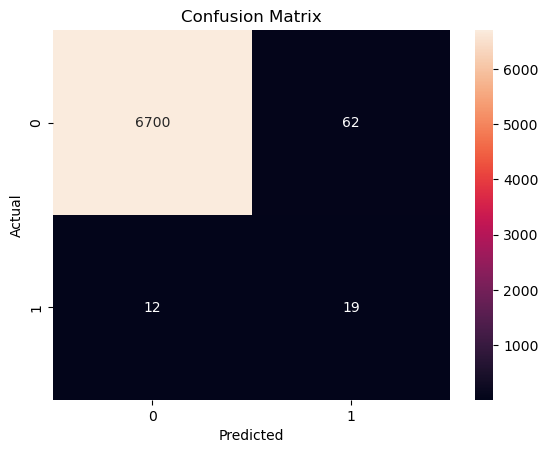

In [53]:
# Create and train the Gaussian Naive Bayes model with tuned hyperparameters
gnb = GaussianNB(var_smoothing=1)  # Replace with your best var_smoothing value
gnb.fit(X_train, y_train)


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix using the true labels (y_test) and predicted labels
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="g")
plt.rcParams['figure.figsize'] = (6, 4) 
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [55]:
# Compute the classification report
class_report = classification_report(y_test, y_test_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6762
           1       0.23      0.61      0.34        31

    accuracy                           0.99      6793
   macro avg       0.62      0.80      0.67      6793
weighted avg       0.99      0.99      0.99      6793



## 3. Logistics Regression

In [64]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc, confusion_matrix
import pickle
from sklearn import metrics
from sklearn.model_selection import cross_val_score


### No parameter tuning

In [65]:
model = LogisticRegression(solver='liblinear' , random_state=0)

In [202]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [203]:
y_pred = model.predict(X_test)

In [204]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

99.4553216546445

In [205]:
print(f'Training score: {model.score(X_train,y_train)}')
print(f'Test score: {model.score(X_test,y_test)}')

Training score: 0.994331566548881
Test score: 0.9945532165464449


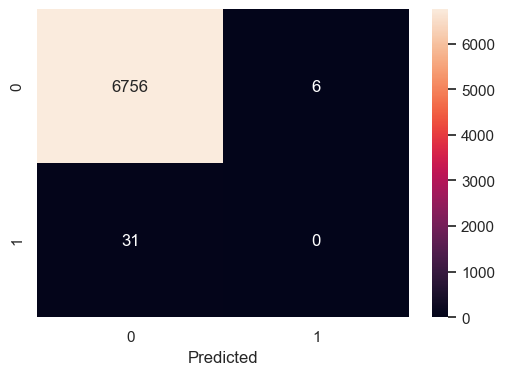

In [206]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True,fmt="g") 
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [207]:
print(classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33788
           1       0.09      0.01      0.02       173

    accuracy                           0.99     33961
   macro avg       0.54      0.51      0.51     33961
weighted avg       0.99      0.99      0.99     33961



### Hyperparameter Tuning 

In [208]:
scores = cross_val_score(model, X_train,y_train, cv=5,scoring='accuracy')
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.99484726 0.99466323 0.99447921 0.99411007 0.99392601]
Average cross-validation score: 0.9944051540697767


In [209]:
parameters = [{'penalty':['none','elasticnet','l1','l2']},
             {'C':[0.001,0.01,1,10,100]},
             {'solver':['liblinear','newton-cg','lbfgs','sag','saga']}]

grid_search = GridSearchCV(estimator = model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          verbose = 0)

In [211]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 1, 10, 100]},
                         {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [212]:
#best score achieved during the GridSearchCV
print(f'GridSearchCV best score: {grid_search.best_score_}')

#print parameters that give the best results
print(f'Paramters that give the best results: {grid_search.best_params_}')

#print estimator that was chosen by the GridSearch
print(f'Estimator that was chosen by the search: {grid_search.best_estimator_}')

GridSearchCV best score: 0.9946260332903363
Paramters that give the best results: {'solver': 'saga'}
Estimator that was chosen by the search: LogisticRegression(random_state=0, solver='saga')


In [213]:
print(f'Training score: {grid_search.score(X_train, y_train)}')
print(f'Test score: {grid_search.score(X_test,y_test)}')

Training score: 0.994589222614841
Test score: 0.9948476372736641


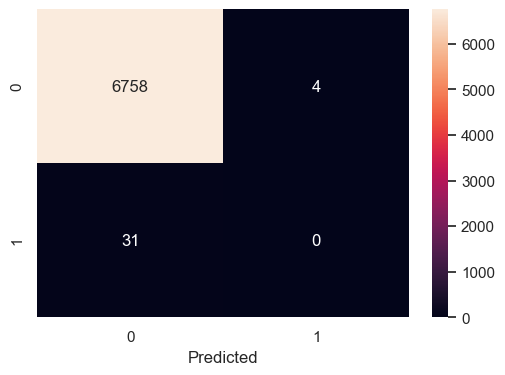

In [214]:
sns.heatmap(confusion_matrix(y_test,grid_search.predict(X_test)),annot=True, fmt="g")
plt.rcParams['figure.figsize'] = (6, 4) 
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [215]:
print(classification_report(y,grid_search.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33788
           1       0.00      0.00      0.00       173

    accuracy                           0.99     33961
   macro avg       0.50      0.50      0.50     33961
weighted avg       0.99      0.99      0.99     33961



In [216]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

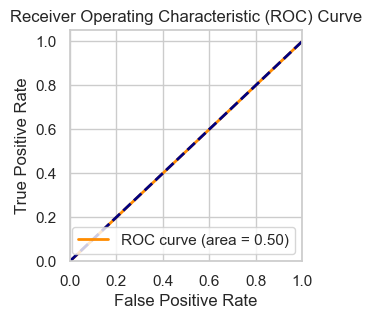

In [217]:
# Plot ROC curve
plt.figure(figsize=(3, 3)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [218]:
# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity:', specificity)

Specificity: 0.9991126885536823


## 4. Support Vector Machine Model

In [219]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt

### No parameter tuning

In [220]:
 #Create a random subset of the training data for faster training since computational time for training SVM model is high
 #Define the subset size
 #subset_size = 20000

 #Generate random indices for the subset
 #subset_indices = np.random.choice(X_train.shape[0], size=subset_size, replace=False)

 #Create the subset of training data
 #X_train = X_train.iloc[subset_indices]
 #y_train = y_train.iloc[subset_indices]

In [221]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [222]:
# Create an SVM classifier (before hyperparameter tuning)
svm_classifier = SVC(random_state=42, class_weight='balanced')

In [223]:
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [224]:
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, svm_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 1.00


<Figure size 300x300 with 0 Axes>

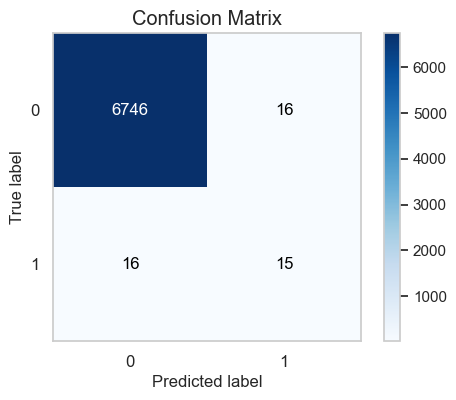

In [225]:
# Plot confusion matrix
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_test, svm_classifier.predict(X_test))
plt.show()

In [226]:
# Generate classification report with precision, recall, F1-score, and support
classification_rep = classification_report(y_test, svm_classifier.predict(X_test))
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       0.48      0.48      0.48        31

    accuracy                           1.00      6793
   macro avg       0.74      0.74      0.74      6793
weighted avg       1.00      1.00      1.00      6793



### Hyperparameter Tuning

In [227]:
# Define a grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'rbf'],  #Possible kernel functions
    'C': [0.1, 1, 10]  # Values of C
}

In [228]:
# Create a GridSearchCV object with 5-fold cross-validation
grid_search_2 = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Perform grid search to find the best hyperparameters
grid_search_2.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters from the grid search
best_params = grid_search_2.best_params_
best_kernel = best_params['kernel']
best_C = best_params['C']
print('Best Hyperparameters:')
print(f'Kernel: {best_kernel}')
print(f'C: {best_C}')

In [ ]:
# Train the final SVM model with the best hyperparameters on the entire training set
final_svm_classifier = SVC(kernel=best_kernel, C=best_C, random_state=42)
final_svm_classifier.fit(X_train, y_train)

In [ ]:
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, final_svm_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, final_svm_classifier.predict(X_test))
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

In [ ]:
# Generate a confusion matrix for the test data - Approach 1
cm = confusion_matrix(y_test, final_svm_classifier.predict(X_test))
cm

# Plot confusion matrix
plt.figure(figsize=(3, 3))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Plot confusion matrix - Approach 2
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_test, final_svm_classifier.predict(X_test))
plt.show()

In [ ]:
# Generate classification report with precision, recall, F1-score, and support
classification_rep = classification_report(y_test, final_svm_classifier.predict(X_test))
print('Classification Report:\n', classification_rep)

In [ ]:
# Get the probability scores for the positive class (class 1)
y_prob = final_svm_classifier.decision_function(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 5. KNN (K - Nearest Neighbors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV

### No parameter tuning

In [ ]:
#defining a range of k values
k_values = list(range(1,21,2))

In [ ]:
#creating a KNN classifier 
knn_classifier = KNeighborsClassifier()

In [ ]:
#define the hyperparameters grid to search over(k values)
param_grid = {'n_neighbors' : k_values}

In [ ]:
#creating a GridSearchCV object with cross-validation (in this case we take it as 5)
grid_search = GridSearchCV(estimator = knn_classifier, param_grid = param_grid, cv =5)

In [ ]:
#fitting the grid search to the training data
grid_search.fit(X_train, y_train)

In [ ]:
#finding the best k_value from the grid search
best_k = grid_search.best_params_['n_neighbors']

In [ ]:
#get the best knn model
best_knn_model = grid_search.best_estimator_

In [ ]:
#evaluating the model
#making predictions using the best model
y_pred = best_knn_model.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="g") 
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [ ]:
#evaluate the model's performance using classification report
classification_rep = classification_report(y_test, y_pred)

In [ ]:
#print the best k value and classification report
print(f'Best k value: {best_k}')
print('Classification Report: ')
print(classification_rep)

### Hyperparameter Tuning

In [ ]:
# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

In [ ]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],  # Experiment with a broader range of neighbors
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [ ]:
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

In [ ]:
# Create the KNN classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                           weights=best_params['weights'], p=best_params['p'])

In [ ]:
# Train the best KNN classifier on your training data
best_knn_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred = best_knn_classifier.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

In [ ]:
# Create and display a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="g") 
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [ ]:
# Calculate ROC curve and AUC
y_prob = best_knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate specificity (True Negative Rate)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')